# GRIP: The Sparks Foundation

## Data Science and Business Analytics Internship

### Intern name: Ishaun Sinha

### Prediction using Supervised Machine Learning 

#### Task: Predict the percentage of a student based on the number of study hours

In [47]:
#importing the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb


#### Reading the given dataset in the question

In [48]:
url= 'http://bit.ly/w-data'
df= pd.read_csv(url)

#### Exploring the given data 

In [49]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Shape of the data matrix

In [50]:
print(df.shape)

(25, 2)


#### Describing the given data

In [51]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Visualising the data

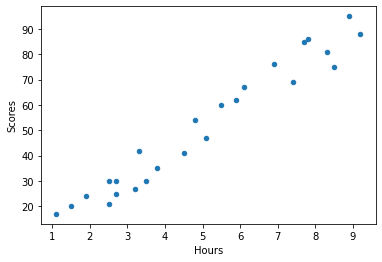

In [58]:
df.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

#### Finding the correlation coefficient

In [59]:
df.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [64]:
studyhours=df['Hours']
scoresobtained= df['Scores']

#### Plotting the distribution plots of both variable

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

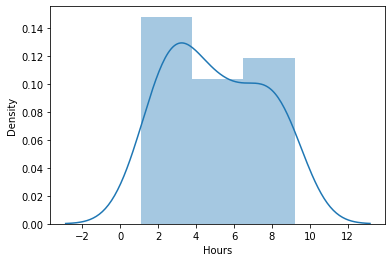

In [67]:
sb.distplot(studyhours)

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

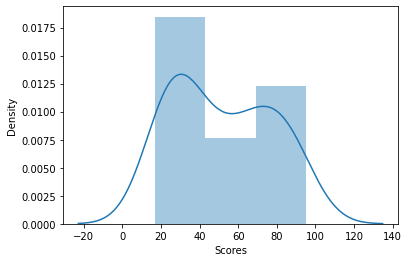

In [68]:
sb.distplot(scoresobtained)

### Linear Regression

In [72]:
X= df.iloc[:,:-1].values
y= df.iloc[:,1].values

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=50)

In [74]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

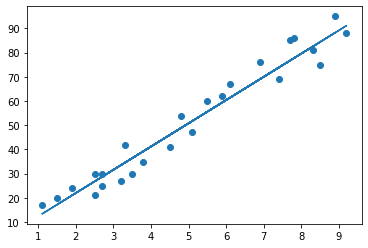

In [75]:
m= model.coef_
c= model.intercept_
line= m*X+c
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [76]:
y_pred= model.predict(X_test)

In [78]:
actualpredicted= pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actualpredicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


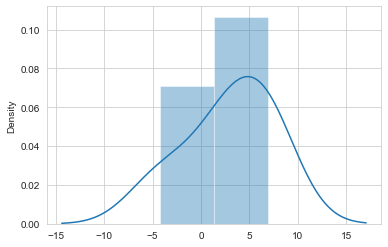

In [80]:
sb.set_style('whitegrid')
sb.distplot(np.array(y_test-y_pred))
plt.show()

### Predicting the score if the student studies for 9.25 hours

In [82]:
hr= 9.25
score= model.predict([[hr]])
print("The student will score {} % marks if he/she studies for {} hours".format(score,hr))

The student will score [91.56986604] % marks if he/she studies for 9.25 hours


### Evaluating the model 

In [83]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R square value:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R square value: 0.971014141329942
